<a href="https://colab.research.google.com/github/zilbersm/ZilbersteinM_Neur265/blob/main/ZilbersM_loops_02_19_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Fundamentals IV

### Loops

In this notebook, we'll begin writing loops.

## At the end of this notebook, you'll be able to:

* Write a simple loop
* Write a simple function

## Loops

Loops allow you to run a bit of code multiple times. They're a great way to avoid copying and pasting the same bit of code multiple times.

### Loops can be written in multiple ways.

The `for` loop iterates over the elements of the supplied list, and executes the containing block once for each element.

Any kind of list can be used in the for loop (e.g., a list, a range, etc.)

In [ ]:
# Simple for loop

values = range(4) #range() creates a range of values starting from 0 and end before the number in (). * up to 4, not include 4 (recall indexing).

# Iterate from i = 0 to i = 3

for i in values:
  print(i)

0
1
2
3


The logic behind this loop looks something like this:

<img src = 'https://drive.google.com/uc?id=13-Mg6fyW5WmyIfot0Y7zpMI64cdC9GbU'>



><b>Task:</b> Make a `for` loop that re-creates the text in the below image:

<img src = 'https://drive.google.com/uc?id=1sdA0HB65T4ZEOojbIk1CMz_ZDa7U8Zj9'>


In [ ]:
# Your code here
values = range(3)

for i in values:
  print(f'i={i} ; You son of a bitch im in')

print(f'i=3 ; You son of a bitch in out')


i=0 ; You son of a bitch im in
i=1 ; You son of a bitch im in
i=2 ; You son of a bitch im in
i=3 ; You son of a bitch in out


Sometimes it is useful to have access to the indices of the values when iterating over a list. We can use the `enumerate` function for this:

In [ ]:
for idx, x in enumerate(range(-3,3)):  #enumerate(_) returns the index, value.
    print(idx, x)

0 -3
1 -2
2 -1
3 0
4 1
5 2


### List Comprehensions

List comprehensions are a very compact way to create lists using a `for` loop:

In [ ]:
# Create a list of values where x is squared for 0, 1, 2, 3, and 4.

list_1 = [x**2 for x in range(0,5)] #loop placed in [__] to make the outputs into a list.

print(list_1)

[0, 1, 4, 9, 16]


### While loops

The operator `while` lets you continue to run a loop as long as something is true.

While loops always have the structure

```
while condition:
  # Loop contents
```  

In [ ]:
message = 'still working'
counter = 0

while counter < 5:
    print(message)

    counter = counter + 1

print("done")

still working
still working
still working
still working
still working
done


### Continue operator

<code>continue</code> is a special operator to jump ahead to the next iteration of a loop.

In [ ]:
lst = [0, 1, 2, 3]

for item in lst:

    if item == 2:
        continue

    print(item)

0
1
3


><b>Task:</b> Re-create the above <code>for</code> loop, but have it skip to the next item if the item equals 1 *or* 2.

In [ ]:
# Your code here
for item in lst:
  if item == 1 or item == 2:
    continue
  print(item)

0
3


### Applying loops to neuroscience data

We'll work with our Patch-Seq dataset (portal.brain-map.org) for these exercises

Create a code cell below that imports the <code>patch_seq_expanded.csv</code> file from our class GitHub repo as a <code>Pandas DataFrame</code> variable called <code>patch_seq</code>.

In [ ]:
# Your code here
import pandas as pd

url = 'https://raw.githubusercontent.com/hallockh/neur_265_spring2026/refs/heads/main/data/patch_seq_expanded.csv'

patch_seq = pd.read_csv(url)


Look at this variable below. There should be three column headers: <code>Marker</code>, <code>ISI</code>, and <code>Fast_Trough</code>. You're already familiar with <code>Marker</code> and <code>ISI</code> - the <code>Fast_Trough</code> variable is the minimum value of the *undershoot* during the action potential.

![](https://github.com/ajuavinett/CellTypesLesson/blob/master/docs/ap_features.png?raw=true)

In [ ]:
# Look at your patch_seq variable here
patch_seq[:5] #outputs first 5 rows.

#Fast Trough: minimum value of memberane potential in the trough.

,ISI,Fast_Trough,Marker
0,77.337143,-49.899998,Sst
1,17.177895,-44.462498,Sst
2,48.294737,-47.350002,Sst
3,8.980000,-45.656254,Sst
4,30.315385,-50.737499,Sst


Let's create a loop that will make a scatter plot of <code>ISI</code> vs. <code>Fast_Trough</code> only for *Sst*-containing neurons

Text(0.5, 1.0, 'ISI vs. Fast Trough')

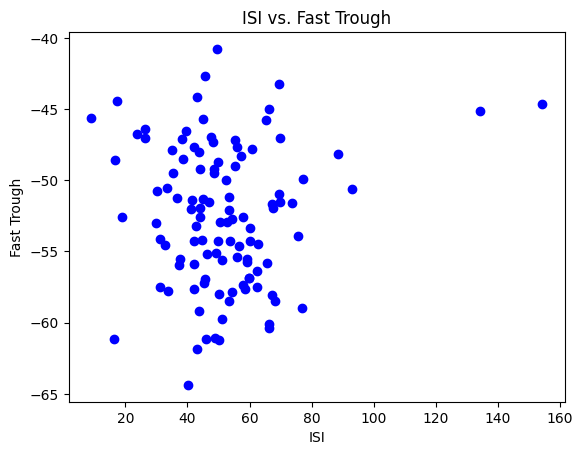

In [ ]:
from matplotlib import pyplot as plt

patch_length = len(patch_seq) #returns the number of items in the first dimension (rows) of your data set

for i in range(patch_length):
  if patch_seq.iloc[i,2] == 'Sst':
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = "blue")

plt.xlabel('ISI')
plt.ylabel('Fast Trough')
plt.title('ISI vs. Fast Trough')



><b>Task:</b> Re-run the above code cell, but create labels for your x-axis and y-axis.

><b>Task:</b> Create a <code>for</code> loop that will make a scatter plot of <code>ISI</code> vs. <code>Fast Trough</code> for *Sst*-containing neurons in blue, and *Pvalb*-containing neurons in red. Label your axes.

Text(0.5, 1.0, 'ISI vs. Fast Trough')

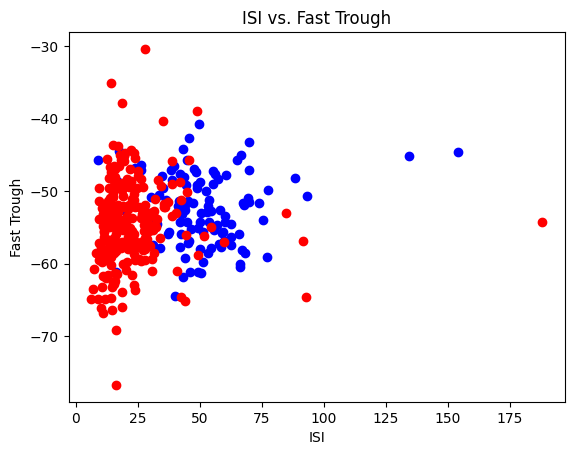

In [ ]:
# Your code here
patch_length = len(patch_seq)

for i in range(patch_length):
  if patch_seq.iloc[i,2] == 'Sst':
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = "blue")
  else: #more efficient than what I had (below).
  #elif patch_seq.iloc[i,2] == 'Pvalb':
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = "red")


plt.xlabel('ISI')
plt.ylabel('Fast Trough')
plt.title('ISI vs. Fast Trough')

# Functions

If we have a useful chunk of code, we can save that as a function to easily recall later, using the keyword `def`. The syntax for functions is similar to loops and if statements:

```
def function():
  print(value)
```



In [ ]:
# Make a function that makes a scatter plot for Sst neurons in blue, and Pvalb neurons in red

def makeScatter(x):
    # First, write docstring:
    """
    This is a function that will create a scatter plot of ISI vs. Fast Trough for Sst-containing and Pvalb-containing neurons.
    For every row that has the marker Sst, plot in blue. For every row that has the marker Pvalb, plot in red.
    Labeled axes and included title.

    Replaced patch_seq with x everywhere. That way, I can put in any variable in () and this will work with other data and such.
    """
    # Your code here!
    patch_length = len(x)

    for i in range(patch_length):
      if x.iloc[i,2] == 'Sst':
        plt.scatter(x.iloc[i,0],x.iloc[i,1],color = "blue")
      else:
       plt.scatter(x.iloc[i,0],x.iloc[i,1],color = "red")

    plt.xlabel('ISI')
    plt.ylabel('Fast Trough')
    plt.title('ISI vs. Fast Trough')

    plt.show()

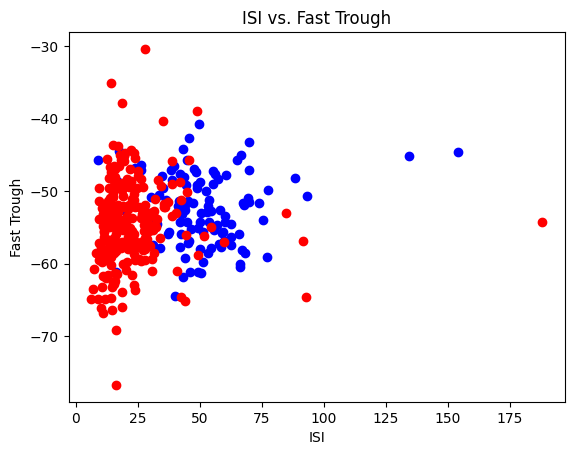

In [ ]:
makeScatter(patch_seq)